# Capstone 1
### Heart Disease Analysis

   Heart disease is the leading cause of death for both men and women in the United States. About 610,000 people die every year- that's equivalent to 1 in every 4 deaths according to the Center for Disease Control. With heart disease being so prevalent, it's vital to understand who is most at risk for this disease. A way that helps providers diagnose heart disease is through stress test. A thallium stresst test is a method that shows how well blood flows into the heart muscle, both at rest and during activity. During activity, the heart works harder to maintain oxygen and blood flow. Narrow arteries can't supply enough blood for your heart to work well. That's why some signs and symptoms of heart disease may occur only during exercise.
   
   In this capstone, we explore a data set that was obtained from the University of California, Irvine,  machine learning repository (via Kaggle). It consists of 14 variables measured on 303 individuals that underwent a thallium stress test. 
    
   As a medical professional, it would be wonderful to get some insight from the this data set, as I've encountered many patients with heart disease. Our goal for this report is to explore that data and determine correlations between heart disease and various variables from the data set. 

    
 # What questions can we look into from this data set?

1. What does age and gender reveal about heart disease? 
2. Is chest pain a good indicator of heart disease?
3. Is there a correlation between exercise induced chest pain and heart disease ? 
4. Is there a correlation between max heart rate achieved during stress test and heart disease?
5. Does cholesterol level and resting blood pressure have any correlation with heart disease?

 
#### Let's get started.

In [10]:
#let's start the imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
heart=pd.read_csv('heart.csv')


In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Variables in the data set include:

##### sex:
(0 = female, 1 = male )

##### cp: chest pain type
Value 0:typical angina
Value 1: atypical angina  
Value 2: non-anginal pain
Value 3: asymptomatic

##### trestbps

resting blood pressure (in mm Hg on admission to the hospital)

##### chol

serum cholestoral in mg/dl

##### fbs

fasting blood sugar > 120 mg/dl:0 = false, 1 = true 

##### restecg: resting electrocardiographic results:                          
Value 0: normal 
Value 1: having ST-T wave abnormality 
Value 2: probable/definitive left ventricular hypertrophy
 
##### thalach

maximum heart rate achieved

##### exang

exercise induced angina (1 = yes; 0 = no)

##### oldpeak

ST depression induced by exercise relative to rest 
         
##### slope
the slope of the peak exercise ST segment

Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
       
##### ca

number of major vessels (0-3) colored by flourosopy

##### thal
3= normal; 6 = fixed defect; 7 = reversable defect

##### target 

0 for no disease and 1 for disease

The data set has inconsistencies in the ca(major vessels) column and thal(stress test result) column. Due to this, I've decided not to explore these variables and it's correlation with heart disease.  

In [12]:
#Let's take a look at the data.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#Making some changes to data set for easier manipulation and make it more readable.
heart.rename(index=str, columns={"thalach": "maxHR"}, inplace=True)
heart['result'] = ['Heart Disease' if v == 1 else 'No Heart Disease' for v in heart.target.values]
heart['gender'] = ['Male' if v == 1 else 'Female' for v in heart.sex.values]
heart['exercise'] = ['Exercise Induced CP' if v == 1 else 'No CP' for v in heart.sex.values]
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,ca,thal,target,result,gender,exercise
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Heart Disease,Male,Exercise Induced CP
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Heart Disease,Male,Exercise Induced CP
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Heart Disease,Female,No CP
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Heart Disease,Male,Exercise Induced CP
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Heart Disease,Female,No CP


### Let's see how many of our population have disease vs. no disease


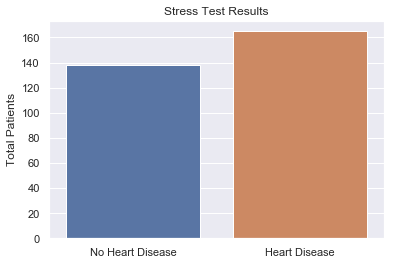

The percentage of our population with heart disease is 54%


In [15]:
sns.set(font_scale=1)
sns.countplot(heart.target)

plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Stress Test Results')
plt.show()

percent=heart[(heart.target)==1].shape[0]/heart.shape[0]
percent= (round(percent, 2))
print ('The percentage of our population with heart disease is {0:.0%}'.format(percent))

# 1. What does age and gender reveal about heart disease?

### 1st, let's look at the age of our sample. 

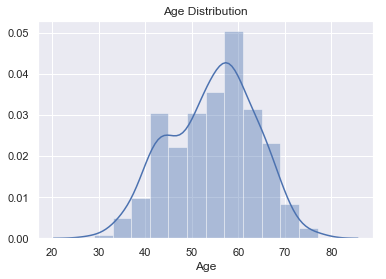

The average age of our sample is 54.0
Here, we see a normal distribution of age.


In [16]:
sns.distplot(heart.age)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Age Distribution')
plt.show()
s=round(heart.age.mean())
print("The average age of our sample is {}".format(s))
print("Here, we see a normal distribution of age.")

### Now let's look at the gender. 

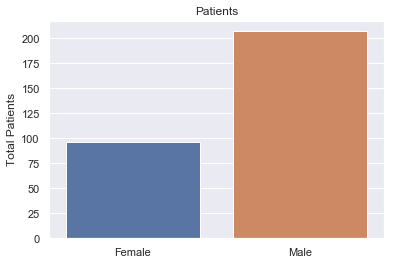

There are 207 male and 96 female.


In [17]:
sns.set()
sns.countplot(heart.sex)
plt.xticks([0,1],['Female', 'Male'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Patients')
plt.show()


female= heart.loc[(heart.sex==0)].shape[0] 
male= heart.loc[(heart.sex==1)].shape[0] 
print ('There are {} male and {} female.'.format(male, female))

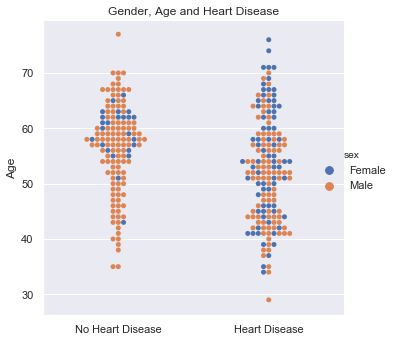

There are 72 women and 93 men with heart disease
Percentage of women with disease: 75%
Percentage of men with heart disease: 45%


In [18]:
#Now let's see who has more heart disease, men or women? 
g=sns.catplot(x="target", y="age", hue="sex", kind="swarm", legend_out=True, data=heart)
new_labels = ['Female', 'Male']
plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Age')
plt.title('Gender, Age and Heart Disease')
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

womenhd= heart[(heart.sex==0)&(heart.target==1)].shape[0]
menhd=heart[(heart.sex==1)&(heart.target==1)].shape[0]
womendp= round(heart[(heart.sex==0)&(heart.target==1)].shape[0]/heart[(heart.sex==0)].shape[0], 2)
mendp=round(heart[(heart.sex==1)&(heart.target==1)].shape[0]/heart[(heart.sex==1)].shape[0], 2)

print('There are {} women and {} men with heart disease'.format(womenhd, menhd))
print('Percentage of women with disease: {0:.0%}'.format(womendp))
print('Percentage of men with heart disease: {0:.0%}'.format(mendp))






We have more men than women in this group, yet 75% of the women in this sample were diagnosed with heart disease vs. 45% of men. 

This is interesting because both men and women are at risk for developing the disease although the way heart disease manifest can be different between men and women. We also know, based from past studies, that women develop heart disease 7-10 years later than men. Menopause also presents risk. Menopause transition is associated with a worsening Coronary Heart Disease risk profile (Maas, 2010). If age is such a big factor for men and women, then let's take a look at the age distribution.


#### Are women older than men? 





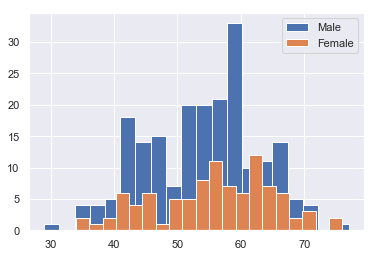

 This shows an equal normal distribution for men and women, 
 but not necessarily that women are older.


In [19]:
heart[heart.sex==1].age.hist(bins=20);
heart[heart.sex==0].age.hist(bins=20);
labels=('Male', 'Female')
plt.legend(labels)
plt.show()
print(' This shows an equal normal distribution for men and women, \n but not necessarily that women are older.')

#### Hmmm..getting even more interesting! Let's take a quick look at mean and std. 

In [20]:
womenhd=heart[(heart.target ==  1) & (heart.sex == 0)].age.mean()
womenstd=heart[(heart.target ==  1) & (heart.sex == 0)].age.std()
print ('Women with heart disease age mean and std')
print(round(womenhd)) #the average age of women with heart disease
print(round(womenstd))
print('Men with heart disease age mean and std')
menhd= heart[(heart.target == 1) & (heart.sex == 1)].age.mean() 
menstd= heart[(heart.target == 1) & (heart.sex == 1)].age.std() 
print (round(menhd)) #average age of men with heart disease. 
print (round(menstd))

Women with heart disease age mean and std
55.0
10.0
Men with heart disease age mean and std
51.0
9.0


### If we do a independent T-test to compare the two means of men and women's ages..what would we see? 

#### Our null hpyothesis: No significant difference between ages of men and women. 

In [21]:
womenAge= heart.loc[heart.sex==0].age
menAge= heart.loc[heart.sex==1].age
print (stats.ttest_ind(womenAge,menAge, equal_var = True))
print ('''We FAIL to reject the null hypothesis. There is no 
significant difference between ages of men and women''')

Ttest_indResult(statistic=1.7163220353587778, pvalue=0.08713196071826866)
We FAIL to reject the null hypothesis. There is no 
significant difference between ages of men and women


Aha! This leads to more questions! Unfortunately, since we don't have another group to compare our samples to, we may not be able to answer the question, why are more women diagnosed with heart disease than men? Could it be a sample bias? Could it be that men die younger than women? We may never know! 

# 2. Is chest pain a good indicator of heart disease?
### Let's look at what type of chest pains patients presented with.

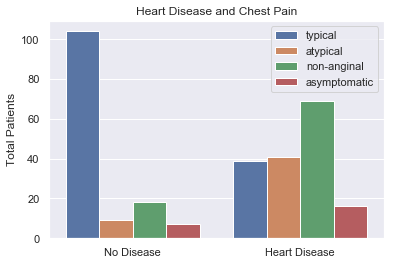

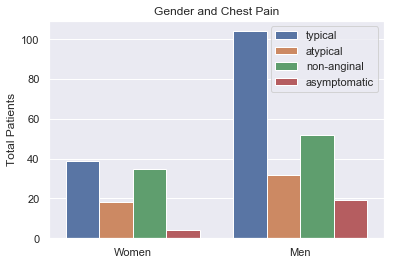

Typical chest pain is the most common type of pain experienced by our patients upon admission.
It looks like more males suffered from typical chest pain than women.
104 men suffered from typical chest pain vs 39 women


In [22]:
sns.countplot(heart.target,hue=heart.cp)
plt.title('Heart Disease and Chest Pain')
plt.legend(['typical','atypical', 'non-anginal', 'asymptomatic'])
plt.xticks([0,1],['No Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()
                        
sns.countplot(heart.sex, hue=heart.cp)
plt.title('Gender and Chest Pain')
plt.legend(['typical','atypical', 'non-anginal', 'asymptomatic'])
plt.xticks([0,1],['Women', 'Men'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()
print('Typical chest pain is the most common type of pain experienced by our patients upon admission.')
print('It looks like more males suffered from typical chest pain than women.')
men=heart[(heart.sex==1) & (heart.cp==0)].shape[0]
women=heart[(heart.sex==0) & (heart.cp==0)].shape[0]
print('{} men suffered from typical chest pain vs {} women'.format(men, women))

#### Let's do an lmplot to visualize different variables like chest pain, age, gender and the result.

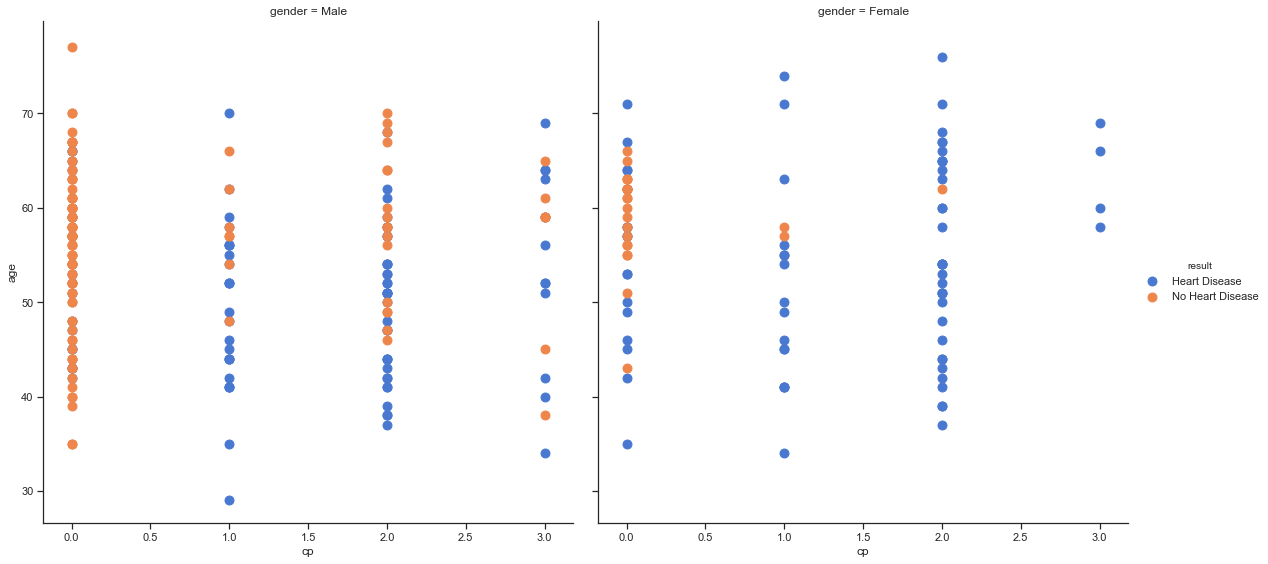

Types of Chest Pain: 
          0:Typical Angina
          1: Atypical Angina
          2: Non-anginal Pain
          3: Asymptomatic


In [23]:
sns.set(style="ticks")
ax= sns.lmplot(x="cp", y="age", col="gender", hue="result", data=heart,
            palette="muted", height=8, fit_reg=False, legend=True,
           scatter_kws={"s": 80, "alpha": 1})

plt.show()
print ("""Types of Chest Pain: 
          0:Typical Angina
          1: Atypical Angina
          2: Non-anginal Pain
          3: Asymptomatic""")




In [24]:
#Calculating percentages for male and female with heart disease and non-anginal pain.
a=heart[(heart.sex==0)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==0)&(heart.target==1)].shape[0]
b=heart[(heart.sex==1)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==1)&(heart.target==1)].shape[0]
print (round(a, 2))
print (round(b, 2))

0.47
0.38


Chest pain type 2, which is non-anginal chest pain is the most common type of chest pain in women and men. Around 47% of women had this chest pain and is positive for heart disease vs. 38% of men. Based on this observation, we can support the fact that women can present heart disease differently than men, almost half our female participants that were diagnosed with heart disease suffered from non-anginal chest pain. Not to be confused with aytpical chest pain, non-anginal pain means pain originating from another part of body other than chest. It could be jaw pain, shoulder pain or back pain (Mayo Clinic).

This supports the current studies about women presenting differently than men. 

# 3. What about chest pain during exercise(stress test)? Is there any correlation with heart disease?

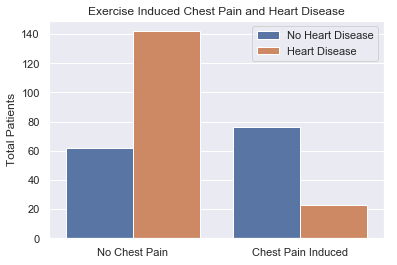

 Here we learn that during stress test, only a small fraction of
 patients had exercise induced angina and was positive for heart disease.
 Only 23 patients are both positive for heart disease and had chest pain induced during exercise.


In [25]:
sns.set(style="darkgrid")
ax = sns.countplot(x="exang", hue="target", data=heart)
plt.title('Exercise Induced Chest Pain and Heart Disease')
plt.xticks([0,1], ('No Chest Pain', 'Chest Pain Induced'))
new_labels=('No Heart Disease', 'Heart Disease')
plt.legend(new_labels, loc='best')
plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()

posex= heart[(heart.exang==1) & (heart.target==1)].shape[0]

print (' Here we learn that during stress test, only a small fraction of\n patients had exercise induced angina and was positive for heart disease.') 
print(' Only {} patients are both positive for heart disease and had chest pain induced during exercise.'.format(posex))




I've worked in the emergency room for many years. When someone comes in with chest pain, the first thing we do is get an electrocardiogram (ECG). The ECG gives us a picture of the heart rythm. I've seen many patients with chest pain upon arrival having ST or T wave abnormality in the EKG.

#### I wonder how this ties in with heart disease? 


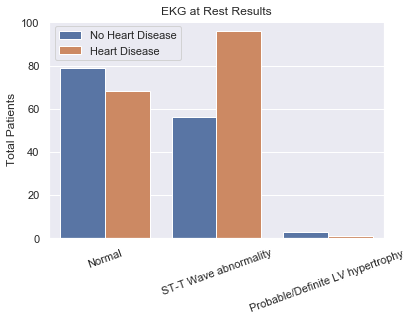

ST-T wave abnormality is most commonly seen in patients with heart disease
96 of our patients had ST-T wave abnormality and heart disease.
Perhaps even more scary to think about is that 68 patients had normal
EKG but was found positive for heart disease.


In [26]:

ax = sns.countplot(x="restecg", hue="target", data=heart)
plt.xticks([0,1,2],['Normal', 'ST-T Wave abnormality', 'Probable/Definite LV hypertrophy '], rotation='20')
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('EKG at Rest Results')
new_labels=('No Heart Disease', 'Heart Disease')
plt.legend(new_labels, loc='best')

plt.show()
stabn=heart[(heart.restecg==1) & (heart.target==1)].shape[0]
stnorm=heart[(heart.restecg==0) & (heart.target==1)].shape[0]
print('ST-T wave abnormality is most commonly seen in patients with heart disease')
print('{} of our patients had ST-T wave abnormality and heart disease.'.format(stabn))
print("""Perhaps even more scary to think about is that {} patients had normal
EKG but was found positive for heart disease.""".format(stnorm))

# 4. Is there a correlation between maxHR levels and heart disease?

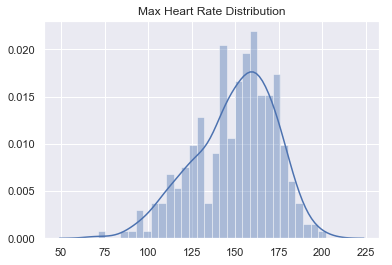

Normal Distribution for Max Heart Rate
Max heart rate's mean is 150.0.
Max heart rate's standard deviation is 23.0.


In [27]:
sns.distplot(heart.maxHR, bins=30)
plt.xlabel('')
plt.title('Max Heart Rate Distribution')
plt.show()

print('Normal Distribution for Max Heart Rate')
meanHR=round(heart.maxHR.mean())
stdMaxHR= round(heart.maxHR.std())
print('Max heart rate\'s mean is {}.'.format(meanHR))
print('Max heart rate\'s standard deviation is {}.'.format(stdMaxHR))

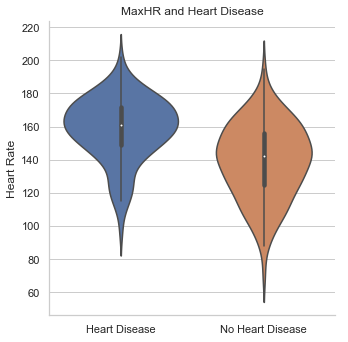

In [28]:
sns.set_style('whitegrid')
sns.catplot(x="result", y="maxHR",
            kind="violin",scale='count', data=heart);
plt.xlabel('')
plt.ylabel('Heart Rate')
plt.title('MaxHR and Heart Disease')
plt.show()


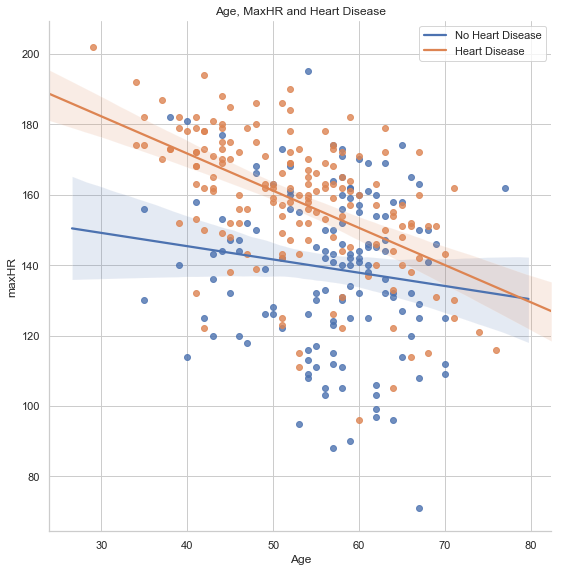

In [29]:
sns.lmplot(x='age', y="maxHR", hue="target", data=heart, fit_reg=True, legend_out=False, height=8)
new_labels=('No Heart Disease', 'Heart Disease')
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.xlabel('Age')
plt.title('Age, MaxHR and Heart Disease')
plt.legend(new_labels)
plt.show()

Participants who have a higher heart rate achieved are diagnosed more with heart disease. 
A patient's target heart rate during a stress is 85% of the maximum heart rate predicted for his/her age.
To calculate max heart rate, subtract 220-age then multiply that by .85 to get target heart rate (Pinkstaff, et. al, 2010). It only makes sense here that the older a patient is, the lower the max heart rate could be achieved. Patients that were negative for heart disease had lower heart rate achieved? Could this be a false negative? Did they just not work hard enough during the test? 



### Let's look at gender and MaxHR.

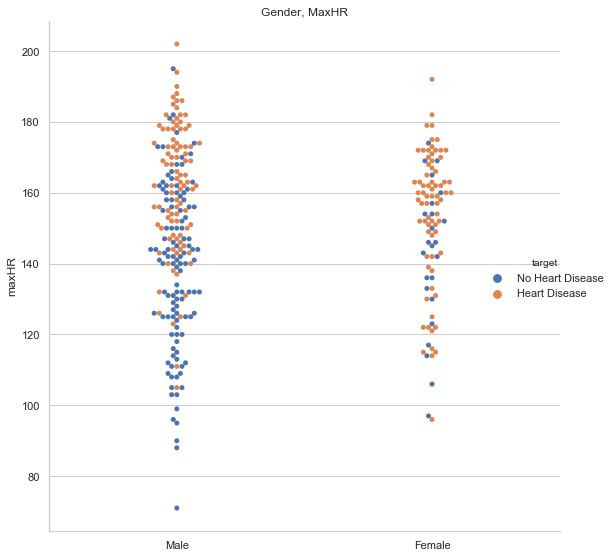

In [30]:
g=sns.catplot(x="gender", y="maxHR", hue="target", kind="swarm", legend_out=True, data=heart, height=8)
plt.title ('Gender, MaxHR')
new_labels=('No Heart Disease', 'Heart Disease')
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.xlabel('')
plt.show()


### Let's look at the t-test between men and women and their heart rate.

#### Our null hypothesis: There is no significant difference between men and women's heart rate.


In [31]:
hrwomen= heart.loc[heart.sex==0].maxHR
hrmen= heart.loc[heart.sex==1].maxHR

print (stats.ttest_ind(hrwomen,hrmen, equal_var = True))
print ("""With a p value of 0.4, , we ACCEPT our null hypothesis. 
There is no significant difference between men and women\'s heart rate.""")


Ttest_indResult(statistic=0.7644578802554902, pvalue=0.4451933047986235)
With a p value of 0.4, , we ACCEPT our null hypothesis. 
There is no significant difference between men and women's heart rate.


# 5. Does cholesterol level and resting blood pressure have any correlation with heart disease?

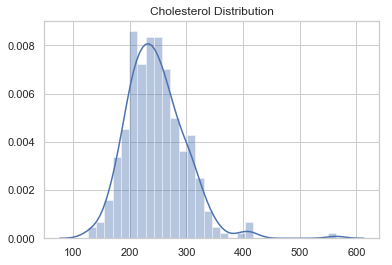

Cholesterol Distribution skews slightly to the right, most of our values are between 200-300


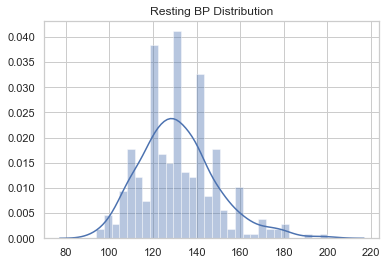

Resting BP skews slightly to the right as well.


In [32]:
sns.distplot(heart.chol, bins=30)
plt.xlabel('')
plt.title('Cholesterol Distribution')
plt.show()
print('Cholesterol Distribution skews slightly to the right, most of our values are between 200-300')
sns.distplot(heart.trestbps, bins=30)
plt.xlabel('')
plt.title('Resting BP Distribution')
plt.show()
print('Resting BP skews slightly to the right as well.')

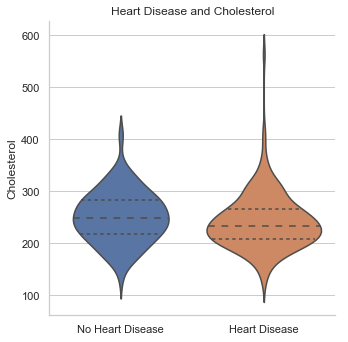

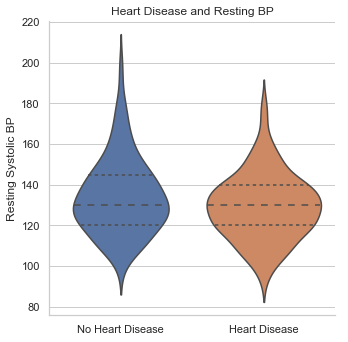

In [33]:
sns.catplot(x="target", y="chol",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Cholesterol')
plt.title('Heart Disease and Cholesterol')
plt.show()

sns.catplot(x="target", y="trestbps",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.ylabel('Resting Systolic BP')
plt.xlabel('')
plt.title('Heart Disease and Resting BP')
plt.show()

The cholesterol levels do not differ much in heart disease group vs. no heart disease. One would think that
it should be higher in people with heart disease. The resting blood pressure also does not differ too greatly from the two groups.

### Let's see if there's any difference in gender!

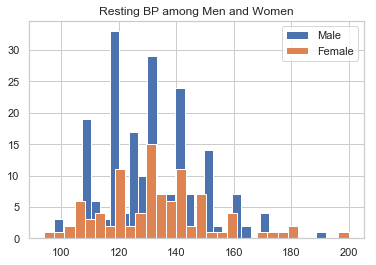

In [34]:
heart[heart.sex==1].trestbps.hist(bins=30);
heart[heart.sex==0].trestbps.hist(bins=30);
labels=('Male', 'Female')
plt.title('Resting BP among Men and Women')
plt.legend(labels)
plt.show()


### Let's see if there's any difference for BP between men and women. 
#### Our null hypothesis : No difference between blood pressures in men and women. 

In [35]:
#our t-test 

womrestbp=heart.loc[heart.sex == 0].trestbps
menrestbp=heart.loc[heart.sex == 1].trestbps
print (stats.ttest_ind(womrestbp,menrestbp, equal_var = True))

print('We FAIL to reject the null hypothesis, there is no difference between BP among men and women ')

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)
We FAIL to reject the null hypothesis, there is no difference between BP among men and women 


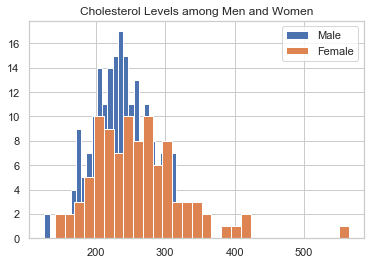

In general, women have a higher baseline cholesterol than men due to hormones


In [39]:
heart[heart.sex==1].chol.hist(bins=30);
heart[heart.sex==0].chol.hist(bins=30);
labels=('Male', 'Female')
plt.title('Cholesterol Levels among Men and Women')
plt.legend(labels)
plt.show()
print('In general, women have a higher baseline cholesterol than men due to hormones')

#### Our null hypothesis :No difference between cholesterol in men and women. 

In [858]:
womchol=heart.loc[heart.sex == 0].chol
menchol=heart.loc[heart.sex == 1].chol
print (stats.ttest_ind(womchol,menchol, equal_var = True))

print('We reject the Null hypothesis! There is a significant difference between men and womens\' cholesterol levels!')



Ttest_indResult(statistic=3.5029368327219244, pvalue=0.000529966610622664)
We reject the Null hypothesis! There is a significant difference between men and womens' cholesterol levels!


# Conclusion

We've explored variables such as age, gender, cholesterol levels, chest pain, heart rate, resting blood pressures and resting ECGS and it's correlation with heart disease. We've found some interesting findings, such as the women in this sample were diagnosed with heart diease 30% more than men. Non-anginal chest pain is associated more with women than men. ST-T wave abnormalities are seen patients with heart disease. We've also foud that resting blood pressures upon admission is not a good indicator of heart disease. Our independent t-tests anaylsis only showed significant difference in cholesterol levels for men and women. In conclusion, further research is needed to determine specific correlations with the various variables explored.  

# Future Research

By answering our questions, we've uncovered more questions. It would be ideal to produce another data set with similar participants to compare with. It's possible that there was a sample bias. Our question regarding why this population had such a higher percentage of heart disease among women is left unanswered. I also wonder about what the diagnosis were for the men in this population with no heart disease. It's very possible that they have a different illness or heart condition. 
    
Though this data set did provide resting systolic BP measurements, it did not show any correlation with heart disease. A better study would be to look at patients with hypertension and their stress test results. It would also be helpful if there are pre and post measurements on certain variables such as blood pressure and heart rate. 




# Reference: 

Maas, A. H., & Appelman, Y. E. (2010). 
    Gender differences in coronary heart disease. 
    Netherlands heart journal : monthly journal of the Netherlands Society of Cardiology and the Netherlands         Heart Foundation, 18(12), 598–602. doi:10.1007/s12471-010-0841-y
    
https://www.ucsfhealth.org/tests/007201.html


How heart disease is different for women. (2019, January 09). Retrieved June 7, 2019, from     
https://www.mayoclinic.org/diseases-conditions/heart-disease/in-depth/heart-disease/art-20046167


Pinkstaff, S., Peberdy, M. A., Kontos, M. C., Finucane, S., & Arena, R. (2010). Quantifying exertion level during exercise stress testing using percentage of age-predicted maximal heart rate, rate pressure product, and perceived exertion. Mayo Clinic proceedings, 85(12), 1095–1100. doi:10.4065/mcp.2010.0357